In [23]:
import math
import pickle
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [24]:
# Read the file in which the values are saved
appa2 = pd.read_csv("../../exports/appa2.csv")
appa2 = appa2.drop('Unnamed: 0', axis=1)

# Random Forest

In [25]:
# Select the features
cols = [
    'LaFeO3_1', 'LaFeO3_2', 
    'STN_1', 'STN_2', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR',
    'STN_1_heatR', 'STN_2_heatR', 
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 
    'STN_1_heatV', 'STN_2_heatV', 
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC', 
    'LaFeO3_1_Age', 'LaFeO3_2_Age',
    'STN_1_Age', 'STN_2_Age', 
    'sin_hour', 'cos_hour', 
    'sin_weekday', 'cos_weekday', 
    'sin_month', 'cos_month', 
    'sin_ordate', 'cos_ordate',
    'year', 
    'UV', 'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 
]

# Select the target
outs = ['PM10', 'CO', 'NO2']

In [26]:
# Split the values in training and test
vsplit = round(len(appa2) * 0.2)

X_train = appa2.iloc[vsplit:][cols]
X_test = appa2.iloc[:vsplit][cols]

Y_train = appa2.iloc[vsplit:][outs]
Y_test = appa2.iloc[:vsplit][outs]

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 1250 - 300, stop= 1250 + 300, num=10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(7 - 3, 7 + 3, num=7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [6, 8, 9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 5 ,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [950, 1016, 1083, 1150, 1216, 1283, 1350, 1416, 1483, 1550], 'max_features': ['sqrt'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [6, 8, 9], 'min_samples_leaf': [4, 5, 6], 'bootstrap': [True, False]}


In [28]:
# Choose the type of model
model = RandomForestRegressor()

In [29]:
# Perform the RandomForestRegression with a Random Search on hyperparameters
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=1283; total time=   7.6s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=1283; total time=   7.8s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=1283; total time=   8.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=1216; total time=   9.7s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=1216; total time=   9.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=1216; total time=  10.4s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=1483; tota

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [4, 5, 6],
                                        'min_samples_split': [6, 8, 9],
                                        'n_estimators': [950, 1016, 1083, 1150,
                                                         1216, 1283, 1350, 1416,
                                                         1483, 1550]},
                   random_state=42, verbose=2)

In [30]:
# Create a Dataframe with the results of the model and then saving them into a .csv file
ris = pd.DataFrame(rf_random.cv_results_)
ris.to_csv('results/results_weather2(3).csv')

In [31]:
# Save the model itself in a .sav file
pickle.dump(rf_random, open('models/model_weather2(3).sav', 'wb'))

## Results

In [32]:
# rf_random = pickle.load(open("random_forest2_gridsearch_weather.sav", "rb"))
# rf_random

In [33]:
print("PM10: " + str(mean_absolute_error(Y_test.PM10 , rf_random.predict(X_test)[: ,0])))
print("CO: " + str(mean_absolute_error(Y_test.CO , rf_random.predict(X_test)[: ,1])))
print("NO2: " + str(mean_absolute_error(Y_test.NO2 , rf_random.predict(X_test)[: ,2])))
print("Total: " + str(mean_absolute_error(Y_test, rf_random.predict(X_test))))

PM10: 13.17966072424221
CO: 0.33654395915961843
NO2: 20.034869302988927
Total: 11.183691328796913


## Hyperparameters Plots

In [34]:
# ris = pd.read_csv("risultati2_weather1.csv")
# ris.columns

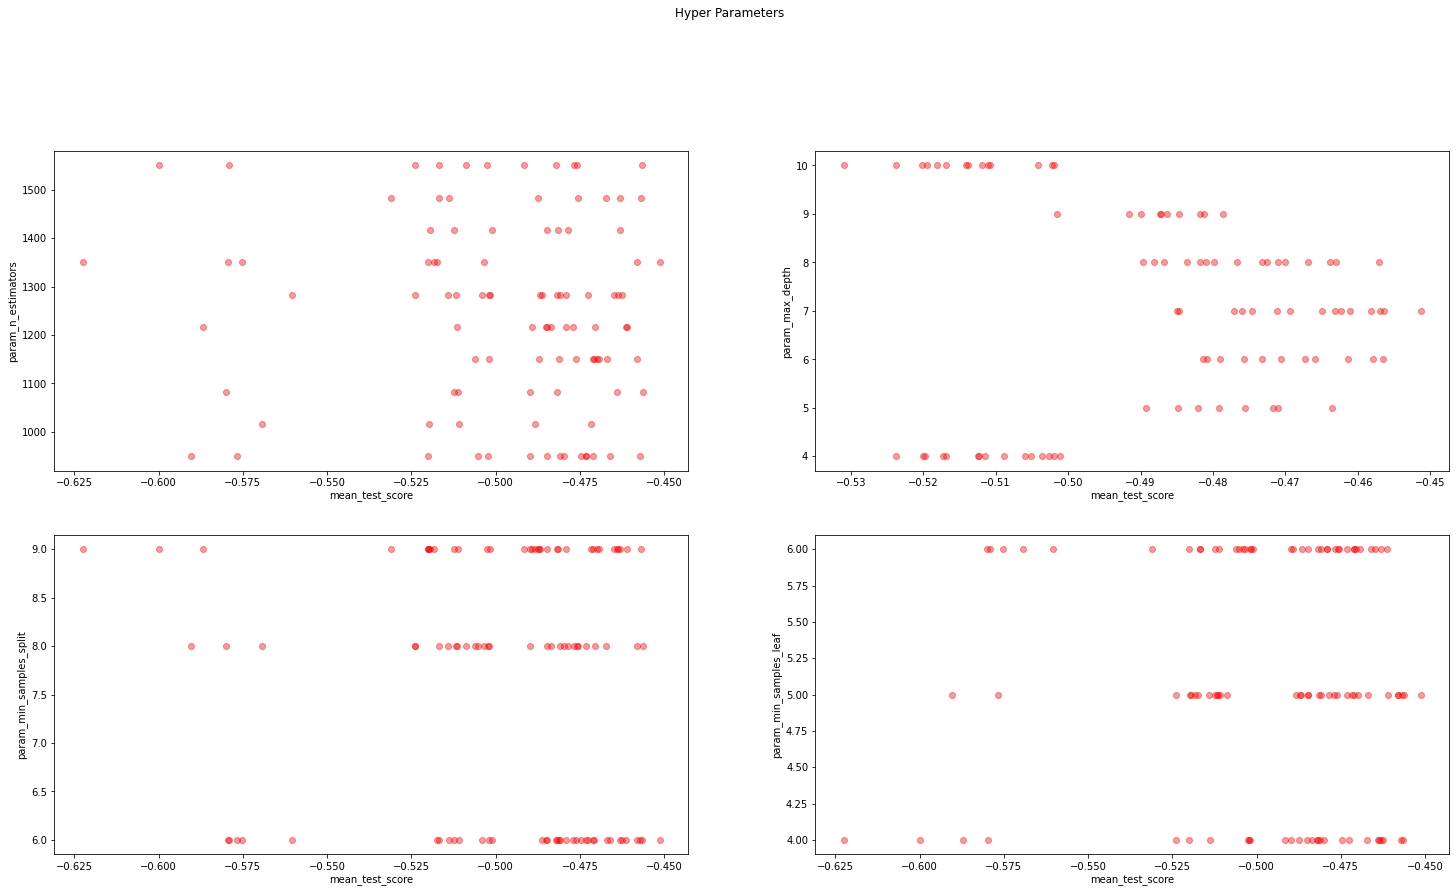

In [35]:
# Plot the hyper-parameters in relation of mean test score
# Values are plotted through dots. The brighter the dot, the more times that value has been chosen by the models.
# On the X axis, the closer the values are to 0 the better they are

h_params = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', ]
fig = plt.figure(figsize=(25, 20))
fig.suptitle('Hyper Parameters')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, h_param in enumerate(h_params):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(ris['mean_test_score'], ris[h_param], color='red', alpha=0.4, )
    ax.set_ylabel(h_param)
    ax.set_xlabel('mean_test_score')
    fig.add_subplot(ax)
fig.show()

## Feature Importance

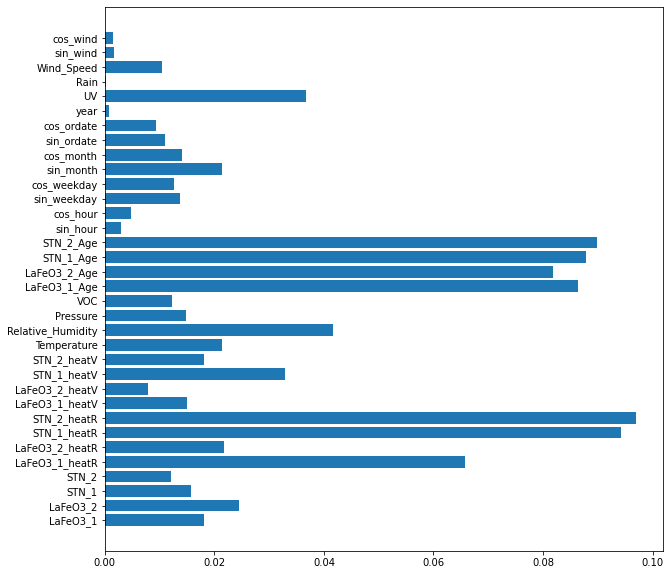

In [36]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()

In [37]:
Y_test

,PM10,CO,NO2
0,16.0,0.6,8.0
1,16.0,0.6,7.0
2,16.0,0.6,8.0
3,17.0,0.5,11.0
4,18.0,0.6,15.0
...,...,...,...
2170,12.0,0.9,45.0
2171,11.0,0.9,41.0
2172,9.0,0.9,40.0
2173,9.0,0.9,40.0


In [38]:
rf_random.predict(X_test)

array([[47.4774229 ,  0.89678123, 58.57488056],
       [27.07160613,  0.86021388, 46.7350213 ],
       [26.30484064,  0.84712778, 45.63658335],
       ...,
       [17.48897835,  0.83365425, 44.94534467],
       [17.06394319,  0.82975527, 44.71011473],
       [17.36978152,  0.83396236, 45.00228539]])

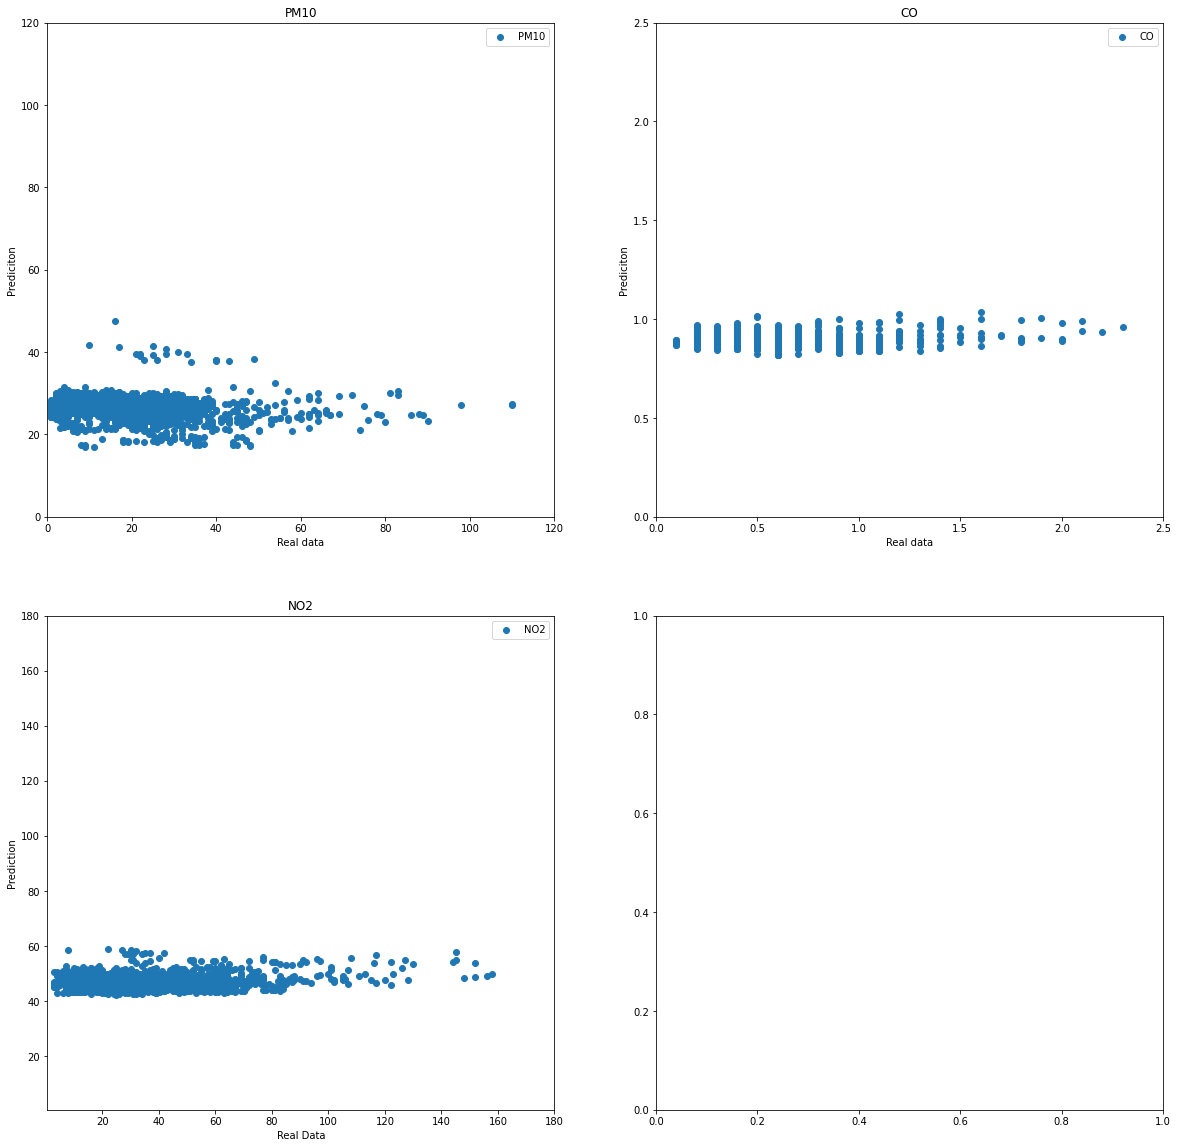

In [41]:
#Printing the charts to undersand better our predictions

fig,((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

ax1.scatter(Y_test.PM10, rf_random.predict(X_test)[:, 0], label = "PM10")
ax2.scatter(Y_test.CO, rf_random.predict(X_test)[:, 1], label = "CO")
ax3.scatter(Y_test.NO2, rf_random.predict(X_test)[:, 2], label = "NO2")

ax1.set_xlim(0, 120)
ax1.set_ylim(0, 120)
ax2.set_xlim(0, 2.5)
ax2.set_ylim(0, 2.5)
ax3.set_xlim(0.5, 180)
ax3.set_ylim(0.5, 180)

ax1.set_title('PM10')
ax1.set_xlabel('Real data')
ax1.set_ylabel('Prediciton')
ax2.set_title('CO')
ax2.set_xlabel('Real data')
ax2.set_ylabel('Prediciton')
ax3.set_title('NO2')
ax3.set_xlabel('Real Data')
ax3.set_ylabel('Prediction')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()